# Query 4.1
Import the csv file of the stock which contained the Bollinger columns as well. 

>Create a new column 'Call' , whose entries are - 
'Buy' if the stock price is below the lower Bollinger band 
'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
'Short' if the stock price is above the upper Bollinger band 

>Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each) 

>Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [1]:
import pandas as pd

#saving the bollinger band columns
tcs_dat = pd.read_csv(r"C:\Users\a\Downloads\ML internship\Large_Cap\TCS.csv")
tcs_dat['14 Day MA'] = tcs_dat['Close Price'].rolling(window=14).mean()
tcs_dat['30 Day STD'] = tcs_dat['Close Price'].rolling(window=20).std()
tcs_dat['Upper Band'] = tcs_dat['14 Day MA'] + (tcs_dat['30 Day STD'] * 2)
tcs_dat['Lower Band'] = tcs_dat['14 Day MA'] - (tcs_dat['30 Day STD'] * 2)
tcs_dat = tcs_dat.dropna()
tcs_dat['Mid Band'] = (tcs_dat['Upper Band']+tcs_dat['Lower Band'])/2
tcs_dat

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band
19,TCS,EQ,09-Jun-2017,2521.60,2520.00,2547.40,2486.00,2518.60,2507.00,2513.28,1574017,3.955950e+09,83931,599286,38.07,2572.610714,71.824613,2716.259941,2428.961488,2572.610714
20,TCS,EQ,12-Jun-2017,2507.00,2497.00,2512.90,2470.40,2484.90,2487.20,2487.48,813253,2.022948e+09,44849,306655,37.71,2570.146429,60.249637,2690.645703,2449.647154,2570.146429
21,TCS,EQ,13-Jun-2017,2487.20,2465.00,2481.10,2447.00,2450.00,2451.55,2464.89,587707,1.448635e+09,52410,268108,45.62,2562.460714,58.090647,2678.642008,2446.279421,2562.460714
22,TCS,EQ,14-Jun-2017,2451.55,2455.00,2476.00,2455.00,2465.40,2470.20,2469.41,744571,1.838651e+09,42987,456486,61.31,2551.432143,56.909942,2665.252026,2437.612259,2551.432143
23,TCS,EQ,15-Jun-2017,2470.20,2469.00,2469.70,2405.00,2410.00,2411.20,2427.94,1498599,3.638509e+09,65157,1140716,76.12,2539.500000,64.820537,2669.141074,2409.858926,2539.500000
24,TCS,EQ,16-Jun-2017,2411.20,2414.95,2435.00,2386.50,2395.00,2399.70,2402.96,1225213,2.944142e+09,72001,709697,57.92,2527.132143,72.062858,2671.257859,2383.006427,2527.132143
25,TCS,EQ,19-Jun-2017,2399.70,2416.90,2446.35,2405.15,2432.00,2431.70,2430.50,822371,1.998776e+09,53034,493678,60.03,2518.603571,75.916937,2670.437445,2366.769698,2518.603571
26,TCS,EQ,20-Jun-2017,2431.70,2431.00,2449.00,2380.30,2443.60,2445.00,2427.14,835479,2.027828e+09,56385,443227,53.05,2511.346429,78.434866,2668.216161,2354.476696,2511.346429
27,TCS,EQ,21-Jun-2017,2445.00,2440.00,2442.15,2397.20,2406.75,2406.30,2412.24,828909,1.999530e+09,60134,488457,58.93,2500.825000,82.730029,2666.285059,2335.364941,2500.825000
28,TCS,EQ,22-Jun-2017,2406.30,2409.00,2431.00,2385.00,2391.45,2394.85,2403.02,2887941,6.939787e+09,51314,2442403,84.57,2488.678571,83.668737,2656.016045,2321.341098,2488.678571


In [2]:
def select_buy(tcs_dat):
    if tcs_dat['Close Price'] < tcs_dat['Lower Band']:
        return "Buy"
    if tcs_dat['Close Price'] > tcs_dat['Lower Band'] and tcs_dat['Close Price'] < tcs_dat['Mid Band']:
        return "Hold Buy/ Liquidate Short"
    if tcs_dat['Close Price'] > tcs_dat['Mid Band'] and tcs_dat['Close Price'] < tcs_dat['Upper Band']:
        return "Hold Short/ Liquidate Buy"
    if tcs_dat['Close Price'] > tcs_dat['Upper Band']:
        return "Short"
tcs_dat = tcs_dat.assign(Call = tcs_dat.apply(select_buy, axis=1))
tcs_dat

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band,Call
19,TCS,EQ,09-Jun-2017,2521.60,2520.00,2547.40,2486.00,2518.60,2507.00,2513.28,...,3.955950e+09,83931,599286,38.07,2572.610714,71.824613,2716.259941,2428.961488,2572.610714,Hold Buy/ Liquidate Short
20,TCS,EQ,12-Jun-2017,2507.00,2497.00,2512.90,2470.40,2484.90,2487.20,2487.48,...,2.022948e+09,44849,306655,37.71,2570.146429,60.249637,2690.645703,2449.647154,2570.146429,Hold Buy/ Liquidate Short
21,TCS,EQ,13-Jun-2017,2487.20,2465.00,2481.10,2447.00,2450.00,2451.55,2464.89,...,1.448635e+09,52410,268108,45.62,2562.460714,58.090647,2678.642008,2446.279421,2562.460714,Hold Buy/ Liquidate Short
22,TCS,EQ,14-Jun-2017,2451.55,2455.00,2476.00,2455.00,2465.40,2470.20,2469.41,...,1.838651e+09,42987,456486,61.31,2551.432143,56.909942,2665.252026,2437.612259,2551.432143,Hold Buy/ Liquidate Short
23,TCS,EQ,15-Jun-2017,2470.20,2469.00,2469.70,2405.00,2410.00,2411.20,2427.94,...,3.638509e+09,65157,1140716,76.12,2539.500000,64.820537,2669.141074,2409.858926,2539.500000,Hold Buy/ Liquidate Short
24,TCS,EQ,16-Jun-2017,2411.20,2414.95,2435.00,2386.50,2395.00,2399.70,2402.96,...,2.944142e+09,72001,709697,57.92,2527.132143,72.062858,2671.257859,2383.006427,2527.132143,Hold Buy/ Liquidate Short
25,TCS,EQ,19-Jun-2017,2399.70,2416.90,2446.35,2405.15,2432.00,2431.70,2430.50,...,1.998776e+09,53034,493678,60.03,2518.603571,75.916937,2670.437445,2366.769698,2518.603571,Hold Buy/ Liquidate Short
26,TCS,EQ,20-Jun-2017,2431.70,2431.00,2449.00,2380.30,2443.60,2445.00,2427.14,...,2.027828e+09,56385,443227,53.05,2511.346429,78.434866,2668.216161,2354.476696,2511.346429,Hold Buy/ Liquidate Short
27,TCS,EQ,21-Jun-2017,2445.00,2440.00,2442.15,2397.20,2406.75,2406.30,2412.24,...,1.999530e+09,60134,488457,58.93,2500.825000,82.730029,2666.285059,2335.364941,2500.825000,Hold Buy/ Liquidate Short
28,TCS,EQ,22-Jun-2017,2406.30,2409.00,2431.00,2385.00,2391.45,2394.85,2403.02,...,6.939787e+09,51314,2442403,84.57,2488.678571,83.668737,2656.016045,2321.341098,2488.678571,Hold Buy/ Liquidate Short


In [3]:
#training a classifier
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
train_X = tcs_dat[['Upper Band','Lower Band','Mid Band','Close Price']]
transfomed_label = le.fit_transform(tcs_dat['Call'])
train_Y = transfomed_label.reshape(-1,1)

In [4]:
import sklearn as sk  
from sklearn.linear_model import LogisticRegression  
import pandas as pd  
import os

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(train_X, train_Y.ravel())
LR.predict(train_X) 
print("Logistic Regression")
round(LR.score(train_X,train_Y), 4)

Logistic Regression


0.9582

In [5]:
import sklearn as sk  
from sklearn import svm  
import pandas as pd  
import os
import warnings
warnings.filterwarnings('ignore')

SVM = svm.LinearSVC()
SVM.fit(train_X, train_Y)
SVM.predict(train_X)
print("Support Vector Machines")
round(SVM.score(train_X,train_Y), 4)

Support Vector Machines


0.6409

In [6]:
import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

Random Forests


0.6555

In [7]:
import sklearn as sk  
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(train_X, train_Y)  
NN.predict(train_X)
print("Neural Networks")
round(NN.score(train_X, train_Y), 4)

Neural Networks


0.5365

# Query 4.2
Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier. 

>Import the stock data file of your choice 

>Define 4 new columns , whose values are: 
% change between Open and Close price for the day 
% change between Low and High price for the day 
5 day rolling mean of the day to day % change in Close Price 
5 day rolling std of the day to day % change in Close Price 

>Create a new column 'Action' whose values are: 
1 if next day's price(Close) is greater than present day's. 
(-1) if next day's price(Close) is less than present day's. 
i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ] 

>Construct a classification model with the 4 new inputs and 'Action' as target 

>Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [8]:
import pandas as pd
itc_data = pd.read_csv(r"C:\Users\a\Downloads\ML internship\Large_Cap\ITC.csv")
itc_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,15-May-2017,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
1,ITC,EQ,16-May-2017,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2,ITC,EQ,17-May-2017,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
3,ITC,EQ,18-May-2017,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
4,ITC,EQ,19-May-2017,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57
5,ITC,EQ,22-May-2017,286.20,292.45,304.80,291.30,303.00,303.60,299.75,35939315,1.077281e+10,250048,17079600,47.52
6,ITC,EQ,23-May-2017,303.60,301.90,303.90,298.25,300.00,300.15,300.39,19784738,5.943114e+09,127039,12142585,61.37
7,ITC,EQ,24-May-2017,300.15,300.00,301.95,297.90,300.10,299.90,299.95,9457848,2.836837e+09,87850,6078221,64.27
8,ITC,EQ,25-May-2017,299.90,300.00,304.70,295.35,301.00,300.05,300.00,22769975,6.830908e+09,110127,16464978,72.31
9,ITC,EQ,26-May-2017,300.05,302.00,313.80,299.55,306.10,309.10,305.48,21742467,6.641980e+09,155758,8123024,37.36


In [9]:
itc_data['%chg op_cl'] = ((itc_data['Close Price'] - itc_data ['Open Price'])/(itc_data['Close Price']))*100
itc_data['%chg lw_hg'] = ((itc_data['Close Price'] - itc_data ['High Price'])/(itc_data['Low Price']))*100
itc_data['%chg 5dymean'] = itc_data['Close Price'].pct_change().dropna().rolling(5).mean()
itc_data['%chg 5dystd'] = itc_data['Close Price'].pct_change().dropna().rolling(5).std()
itc_data = itc_data.dropna()
itc_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd
5,ITC,EQ,22-May-2017,286.20,292.45,304.80,291.30,303.00,303.60,299.75,35939315,1.077281e+10,250048,17079600,47.52,3.672596,-0.411946,0.018157,0.029787
6,ITC,EQ,23-May-2017,303.60,301.90,303.90,298.25,300.00,300.15,300.39,19784738,5.943114e+09,127039,12142585,61.37,-0.583042,-1.257334,0.011927,0.032495
7,ITC,EQ,24-May-2017,300.15,300.00,301.95,297.90,300.10,299.90,299.95,9457848,2.836837e+09,87850,6078221,64.27,-0.033344,-0.688150,0.013031,0.031806
8,ITC,EQ,25-May-2017,299.90,300.00,304.70,295.35,301.00,300.05,300.00,22769975,6.830908e+09,110127,16464978,72.31,0.016664,-1.574403,0.015793,0.029458
9,ITC,EQ,26-May-2017,300.05,302.00,313.80,299.55,306.10,309.10,305.48,21742467,6.641980e+09,155758,8123024,37.36,2.296991,-1.569020,0.015852,0.029494
10,ITC,EQ,29-May-2017,309.10,304.00,319.85,303.50,315.35,315.85,315.57,19665146,6.205697e+09,167423,9323137,47.41,3.751781,-1.317957,0.008061,0.017261
11,ITC,EQ,30-May-2017,315.85,312.90,315.20,310.05,311.50,311.45,311.96,8547146,2.666365e+09,72697,5731236,67.05,-0.465564,-1.209482,0.007547,0.018006
12,ITC,EQ,31-May-2017,311.45,311.45,313.40,307.00,312.85,311.80,310.49,12308066,3.821533e+09,124108,8403582,68.28,0.112251,-0.521173,0.007939,0.017798
13,ITC,EQ,01-Jun-2017,311.80,312.00,316.75,310.80,315.00,314.20,315.10,8253042,2.600519e+09,91321,4704937,57.01,0.700191,-0.820463,0.009378,0.017331
14,ITC,EQ,02-Jun-2017,314.20,316.10,319.90,315.20,319.30,319.20,317.86,11073749,3.519852e+09,65848,7008906,63.29,0.971178,-0.222081,0.006528,0.013889


In [10]:
arr = []
val = []
for value in itc_data['Close Price'].iteritems():
    arr.append(value[1])
for i in range(0,483):
    if arr[i+1] > arr[i]:
        val.append(1)
    else:
        val.append(-1)
itc_data['Action'] = pd.DataFrame(val)
itc_data = itc_data.dropna()
itc_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd,Action
5,ITC,EQ,22-May-2017,286.20,292.45,304.80,291.30,303.00,303.60,299.75,35939315,1.077281e+10,250048,17079600,47.52,3.672596,-0.411946,0.018157,0.029787,-1.0
6,ITC,EQ,23-May-2017,303.60,301.90,303.90,298.25,300.00,300.15,300.39,19784738,5.943114e+09,127039,12142585,61.37,-0.583042,-1.257334,0.011927,0.032495,1.0
7,ITC,EQ,24-May-2017,300.15,300.00,301.95,297.90,300.10,299.90,299.95,9457848,2.836837e+09,87850,6078221,64.27,-0.033344,-0.688150,0.013031,0.031806,1.0
8,ITC,EQ,25-May-2017,299.90,300.00,304.70,295.35,301.00,300.05,300.00,22769975,6.830908e+09,110127,16464978,72.31,0.016664,-1.574403,0.015793,0.029458,1.0
9,ITC,EQ,26-May-2017,300.05,302.00,313.80,299.55,306.10,309.10,305.48,21742467,6.641980e+09,155758,8123024,37.36,2.296991,-1.569020,0.015852,0.029494,-1.0
10,ITC,EQ,29-May-2017,309.10,304.00,319.85,303.50,315.35,315.85,315.57,19665146,6.205697e+09,167423,9323137,47.41,3.751781,-1.317957,0.008061,0.017261,-1.0
11,ITC,EQ,30-May-2017,315.85,312.90,315.20,310.05,311.50,311.45,311.96,8547146,2.666365e+09,72697,5731236,67.05,-0.465564,-1.209482,0.007547,0.018006,1.0
12,ITC,EQ,31-May-2017,311.45,311.45,313.40,307.00,312.85,311.80,310.49,12308066,3.821533e+09,124108,8403582,68.28,0.112251,-0.521173,0.007939,0.017798,-1.0
13,ITC,EQ,01-Jun-2017,311.80,312.00,316.75,310.80,315.00,314.20,315.10,8253042,2.600519e+09,91321,4704937,57.01,0.700191,-0.820463,0.009378,0.017331,-1.0
14,ITC,EQ,02-Jun-2017,314.20,316.10,319.90,315.20,319.30,319.20,317.86,11073749,3.519852e+09,65848,7008906,63.29,0.971178,-0.222081,0.006528,0.013889,-1.0


In [11]:
#training a classifier
from sklearn import preprocessing
# create the Labelencoder object
# le = preprocessing.LabelEncoder()
train_X = itc_data[['%chg op_cl','%chg lw_hg','%chg 5dymean','%chg 5dystd']]
train_Y = itc_data[['Action']]
# trafomed_label = le.fit_transform(tcs_dat[['Call']])
# train_Y = transfomed_label.reshape(-1,1)

import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

Random Forests


0.6088

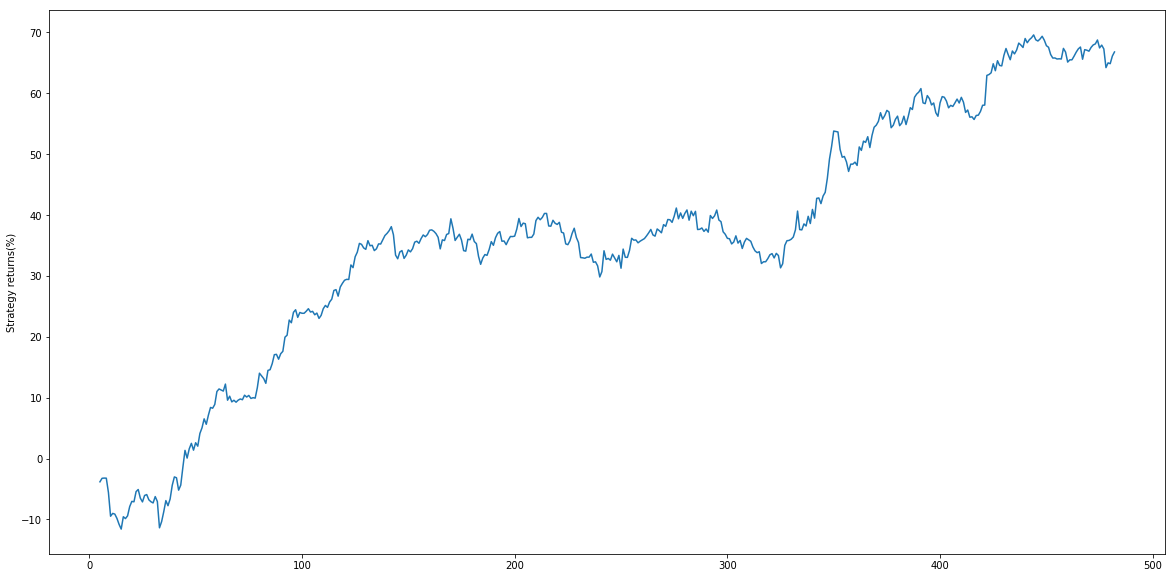

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
itc_data['Net Cummulative Returns'] = (((itc_data['Open Price'] - itc_data['Close Price'])/(itc_data['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.ylabel('Strategy returns(%)')
plt.plot(itc_data['Net Cummulative Returns'])